## Introduction

A job posting is an official advertisement of job openings published for job seekers. It is kind of a written announcement to inform candidates about available job opportunities. A job posting included details about the position such as company detail, job roles, and responsibilities.

Scammers advertise jobs the same way honest employers do — online (in ads, on job sites, and social media), in newspapers, and sometimes on TV and radio. They promise you a job, but what they want is your money and your personal information.

The purpose of this analysis is

1. Create a classification model that uses text data features and meta-features and predict which job description are fraudulent or real.
2. Identify key traits/features (words, entities, phrases) of job descriptions which are fraudulent in nature.
3. Run a contextual embedding model to identify the most similar job descriptions.
4. Perform Exploratory Data Analysis on the dataset to identify interesting insights from this dataset.

In [44]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, StackingClassifier, VotingClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, auc, roc_curve
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim.models import Word2Vec
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('fake_job_postings.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
df.isnull().sum()/len(df)*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns = 'job_id', inplace= True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
telecommuting,17880.0,0.042897,0.202631,0.0,0.0,0.0,0.0,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.0,1.0,1.0,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.0,0.0,1.0,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.0,0.0,0.0,1.0


In [10]:
df.select_dtypes(include= 'object').describe().T

,count,unique,top,freq
title,17880,11231,English Teacher Abroad,311
location,17534,3105,"GB, LND, London",718
department,6333,1337,Sales,551
salary_range,2868,874,0-0,142
company_profile,14572,1709,We help teachers get safe &amp; secure jobs ab...,726
description,17879,14801,"Play with kids, get paid for it Love travel? J...",379
requirements,15184,11967,University degree required. TEFL / TESOL / CEL...,410
benefits,10668,6204,See job description,726
employment_type,14409,5,Full-time,11620
required_experience,10830,7,Mid-Senior level,3809


In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('-----------------------')

title
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: count, Length: 11231, dtype: int64
-----------------------
location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, 

<Axes: xlabel='count', ylabel='employment_type'>

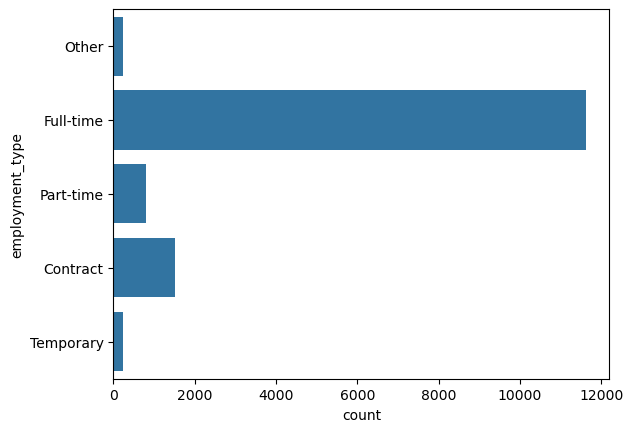

In [13]:
sns.countplot(df['employment_type'])

In [14]:
for i in ['company_profile','description','requirements','benefits']:
    df[i].fillna('', inplace= True)

In [15]:
df['text'] = df['company_profile'] + " " + df['description'] + " " + df['requirements'] + " " + df['benefits']

In [16]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,NaN,NaN,Marketing,0,"We're Food52, and we've created a groundbreaki..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,"90 Seconds, the worlds Cloud Video Production ..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,NaN,NaN,NaN,NaN,NaN,0,Valor Services provides Workforce Solutions th...
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Our passion for improving quality of life thro...
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,SpotSource Solutions LLC is a Global Human Cap...


In [17]:
dftext = df[['text', 'fraudulent']]
dftext.head()

,text,fraudulent
0,"We're Food52, and we've created a groundbreaki...",0
1,"90 Seconds, the worlds Cloud Video Production ...",0
2,Valor Services provides Workforce Solutions th...,0
3,Our passion for improving quality of life thro...,0
4,SpotSource Solutions LLC is a Global Human Cap...,0


In [19]:
dftext.duplicated().sum()

2406

In [20]:
dftext.drop_duplicates(inplace= True)

In [31]:
fraudtext = dftext[dftext['fraudulent'] == 1]
fraudtext.head()

,text,fraudulent
98,...,1
144,The group has raised a fund for the purchase ...,1
173,Edison International and Refined Resources hav...,1
180,Sales Executive Sales Executive Sales Executive,1
215,...,1


In [32]:
genuinetext = dftext[dftext['fraudulent'] == 0]
genuinetext.head()

,text,fraudulent
0,"We're Food52, and we've created a groundbreaki...",0
1,"90 Seconds, the worlds Cloud Video Production ...",0
2,Valor Services provides Workforce Solutions th...,0
3,Our passion for improving quality of life thro...,0
4,SpotSource Solutions LLC is a Global Human Cap...,0


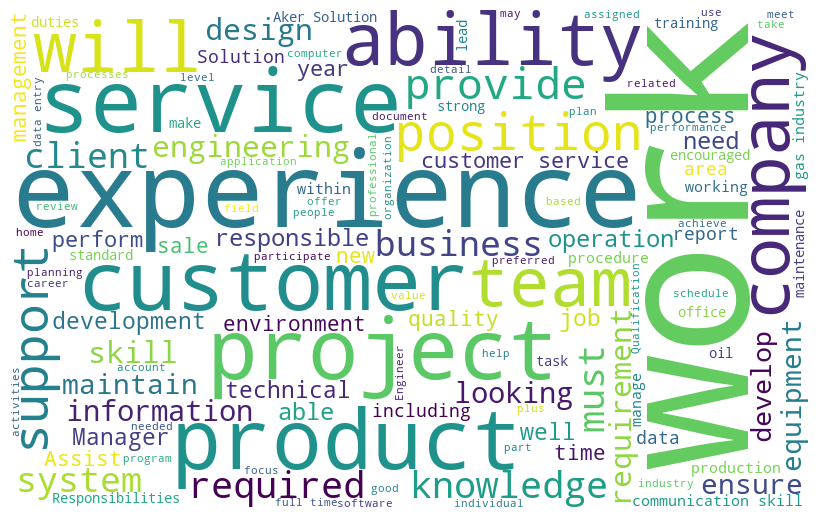

In [33]:
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(fraudtext['text'].astype(str)))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

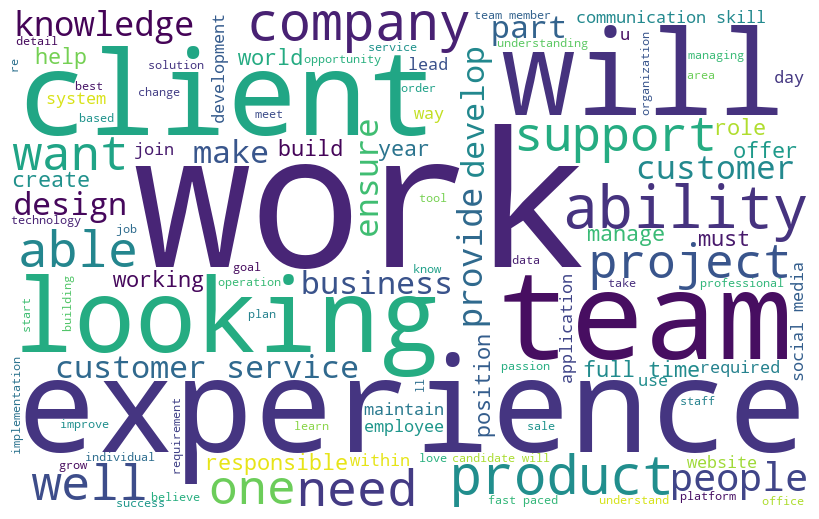

In [34]:
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(genuinetext['text'].astype(str)))
plt.figure(figsize = (8, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [21]:
x = dftext['text']
y = dftext['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify= y)

## TFIDF Method

In [55]:
# Feature extraction
tfidf_vectorizer = TfidfVectorizer(min_df= 1, max_df= 20, ngram_range= (1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [56]:
# Model training
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train_tfidf, y_train)

# Model evaluation
y_pred = lr.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.979967689822294
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2958
           1       0.96      0.57      0.72       137

    accuracy                           0.98      3095
   macro avg       0.97      0.78      0.85      3095
weighted avg       0.98      0.98      0.98      3095



In [57]:
dt = DecisionTreeClassifier(class_weight = 'balanced')
dt.fit(X_train_tfidf, y_train)

# Model evaluation
y_pred = dt.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9615508885298869
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2958
           1       0.56      0.60      0.58       137

    accuracy                           0.96      3095
   macro avg       0.77      0.79      0.78      3095
weighted avg       0.96      0.96      0.96      3095



## Count Vectorizer Method

In [45]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)

0.9689822294022618

In [46]:
metrics.f1_score(y_test, pred)

0.5102040816326531

In [48]:
from sklearn.linear_model import SGDClassifier

clf_log = SGDClassifier(loss='log_loss').fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

0.9822294022617124

In [49]:
metrics.f1_score(y_test, pred_log)

0.7808764940239044

In [50]:
print("Classification Report:\n", classification_report(y_test, pred_log))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2958
           1       0.86      0.72      0.78       137

    accuracy                           0.98      3095
   macro avg       0.92      0.85      0.89      3095
weighted avg       0.98      0.98      0.98      3095

